In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#question1

df_aapl = pd.read_csv(r'AAPL.csv', index_col='Date').iloc[0:-4]
df_aapl.index = pd.to_datetime(df_aapl.index, format='%Y-%m-%d')

df_ibm = pd.read_csv(r'IBM.csv', index_col='Date').iloc[0:-4]
df_ibm.index = pd.to_datetime(df_ibm.index, format='%Y-%m-%d')

df_jpm = pd.read_csv(r'JPM.csv', index_col='Date').iloc[0:-4]
df_jpm.index = pd.to_datetime(df_jpm.index, format='%Y-%m-%d')

df_dji = pd.read_csv(r'DJI.csv', index_col='Date').iloc[0:-4]
df_dji.index = pd.to_datetime(df_dji.index, format='%Y-%m-%d')

In [4]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,187.766640,189.646154,185.891336,187.786357,186.223776,3.272384e+07
std,22.314686,22.450839,22.179512,22.330877,22.077041,1.427659e+07
min,143.979996,145.720001,142.000000,142.190002,141.582779,1.251390e+07
25%,171.220001,172.839996,169.625000,170.944999,170.209107,2.283110e+07
50%,186.350006,187.809998,185.100006,186.440002,184.411102,2.901770e+07
75%,207.529999,209.640000,206.379997,208.240005,206.232834,3.938885e+07
max,230.779999,233.470001,229.779999,232.070007,230.275482,9.624670e+07


In [5]:
df_ibm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,138.451822,139.490770,137.314332,138.356599,134.840205,5.214225e+06
std,12.212233,12.009360,12.302672,12.125288,10.746462,3.346461e+06
min,108.000000,111.000000,105.940002,107.570000,106.331108,1.963200e+06
25%,130.909996,131.894996,128.404999,130.285004,127.164894,3.454950e+06
50%,142.929993,144.080002,142.179993,143.000000,138.566391,4.239900e+06
75%,146.674995,147.300003,145.615005,146.419998,141.873985,5.389000e+06
max,160.059998,162.000000,159.639999,160.910004,153.671936,2.206370e+07


In [6]:
df_jpm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,108.773036,109.717530,107.737004,108.663684,107.297936,1.470041e+07
std,5.377210,5.218206,5.459230,5.322690,4.862787,5.341134e+06
min,92.690002,94.220001,91.110001,92.139999,91.397758,6.488400e+06
25%,104.694999,105.465000,103.680001,104.689999,104.139999,1.081290e+07
50%,109.449997,110.730003,107.809998,109.089996,107.506935,1.374490e+07
75%,113.370003,114.310001,112.599998,113.360000,111.431881,1.704650e+07
max,119.129997,119.239998,118.080002,118.629997,116.856049,4.131390e+07


In [7]:
df_dji.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,24990.545634,25131.659326,24833.935500,24987.737609,24987.737609,3.319288e+08
std,861.583153,817.578835,905.543987,861.233132,861.233132,9.306514e+07
min,21857.730469,22339.869141,21712.529297,21792.199219,21792.199219,1.559400e+08
25%,24482.594727,24602.370117,24269.225586,24419.549805,24419.549805,2.684000e+08
50%,25008.820313,25106.390625,24857.089844,25019.410156,25019.410156,3.130100e+08
75%,25551.225586,25672.635742,25413.140625,25551.000000,25551.000000,3.790300e+08
max,26833.470703,26951.810547,26789.080078,26828.390625,26828.390625,9.005100e+08


In [8]:
def compute_ret(df):
    log_ret = df['Adj Close'].apply(np.log).diff().fillna(0).to_frame()
    sim_ret = df['Adj Close'].pct_change().fillna(0).to_frame()
    log_ret.columns = ['Log Ret']
    sim_ret.columns = ['Simple Ret']
    return pd.concat([df, log_ret, sim_ret], axis=1)

In [9]:
df_aapl = compute_ret(df_aapl)
df_ibm = compute_ret(df_ibm)
df_jpm = compute_ret(df_jpm)
df_dji = compute_ret(df_dji)

In [10]:
df_aapl

,Open,High,Low,Close,Adj Close,Volume,Log Ret,Simple Ret
Date,,,,,,,,
2018-03-16,178.649994,179.119995,177.619995,178.020004,175.349915,39404700,0.000000,0.000000
2018-03-19,177.320007,177.470001,173.660004,175.300003,172.670731,33446800,-0.015397,-0.015279
2018-03-20,175.240005,176.800003,174.940002,175.240005,172.611618,19649400,-0.000342,-0.000342
2018-03-21,175.039993,175.089996,171.259995,171.270004,168.701157,36338100,-0.022915,-0.022655
2018-03-22,170.000000,172.679993,168.600006,168.850006,166.317459,41490800,-0.014230,-0.014130
...,...,...,...,...,...,...,...,...
2019-03-05,175.940002,176.000000,174.539993,175.529999,175.529999,19737400,-0.001821,-0.001820
2019-03-06,174.669998,175.490005,173.940002,174.520004,174.520004,20810400,-0.005771,-0.005754
2019-03-07,173.869995,174.440002,172.020004,172.500000,172.500000,24796400,-0.011642,-0.011575


In [11]:
df_ibm

,Open,High,Low,Close,Adj Close,Volume,Log Ret,Simple Ret
Date,,,,,,,,
2018-03-16,160.059998,161.979996,159.639999,160.259995,153.051163,9262700,0.000000,0.000000
2018-03-19,159.710007,159.889999,156.449997,157.350006,150.272064,5482000,-0.018325,-0.018158
2018-03-20,157.520004,157.929993,155.289993,156.199997,149.173782,4336700,-0.007335,-0.007309
2018-03-21,156.570007,158.199997,155.919998,156.690002,149.641754,3482200,0.003132,0.003137
2018-03-22,155.000000,155.250000,152.000000,152.089996,145.248657,4746300,-0.029797,-0.029357
...,...,...,...,...,...,...,...,...
2019-03-05,138.369995,138.740005,137.559998,137.880005,137.880005,4250300,-0.003981,-0.003973
2019-03-06,138.119995,138.389999,136.720001,136.979996,136.979996,2768300,-0.006549,-0.006527
2019-03-07,136.610001,136.889999,134.630005,135.360001,135.360001,4358800,-0.011897,-0.011827


In [12]:
df_jpm

,Open,High,Low,Close,Adj Close,Volume,Log Ret,Simple Ret
Date,,,,,,,,
2018-03-16,115.339996,116.599998,115.339996,115.440002,112.528511,19888900,0.000000,0.000000
2018-03-19,115.099998,115.449997,113.300003,114.529999,111.641449,13214900,-0.007914,-0.007883
2018-03-20,114.870003,115.449997,114.449997,114.639999,111.748680,9921200,0.000960,0.000960
2018-03-21,114.809998,116.629997,114.209999,114.739998,111.846161,13633000,0.000872,0.000872
2018-03-22,113.199997,113.599998,109.540001,109.949997,107.176964,22550400,-0.042643,-0.041747
...,...,...,...,...,...,...,...,...
2019-03-05,104.129997,104.550003,103.260002,104.110001,104.110001,10856600,-0.000768,-0.000768
2019-03-06,103.860001,104.570000,103.550003,103.720001,103.720001,9070800,-0.003753,-0.003746
2019-03-07,103.250000,103.470001,102.160004,102.970001,102.970001,12705700,-0.007257,-0.007231


In [13]:
df_dji

,Open,High,Low,Close,Adj Close,Volume,Log Ret,Simple Ret
Date,,,,,,,,
2018-03-16,24877.339844,25031.000000,24857.089844,24946.509766,24946.509766,654240000,0.000000,0.000000
2018-03-19,24893.689453,24893.689453,24453.140625,24610.910156,24610.910156,377990000,-0.013544,-0.013453
2018-03-20,24650.640625,24803.609375,24650.640625,24727.269531,24727.269531,342510000,0.004717,0.004728
2018-03-21,24723.490234,24977.650391,24655.400391,24682.310547,24682.310547,343230000,-0.001820,-0.001818
2018-03-22,24526.009766,24526.009766,23938.740234,23957.890625,23957.890625,439280000,-0.029789,-0.029350
...,...,...,...,...,...,...,...,...
2019-03-05,25829.070313,25877.150391,25725.630859,25806.630859,25806.630859,252260000,-0.000504,-0.000504
2019-03-06,25818.759766,25837.609375,25633.710938,25673.460938,25673.460938,256250000,-0.005174,-0.005160
2019-03-07,25645.449219,25645.449219,25352.550781,25473.230469,25473.230469,289140000,-0.007830,-0.007799


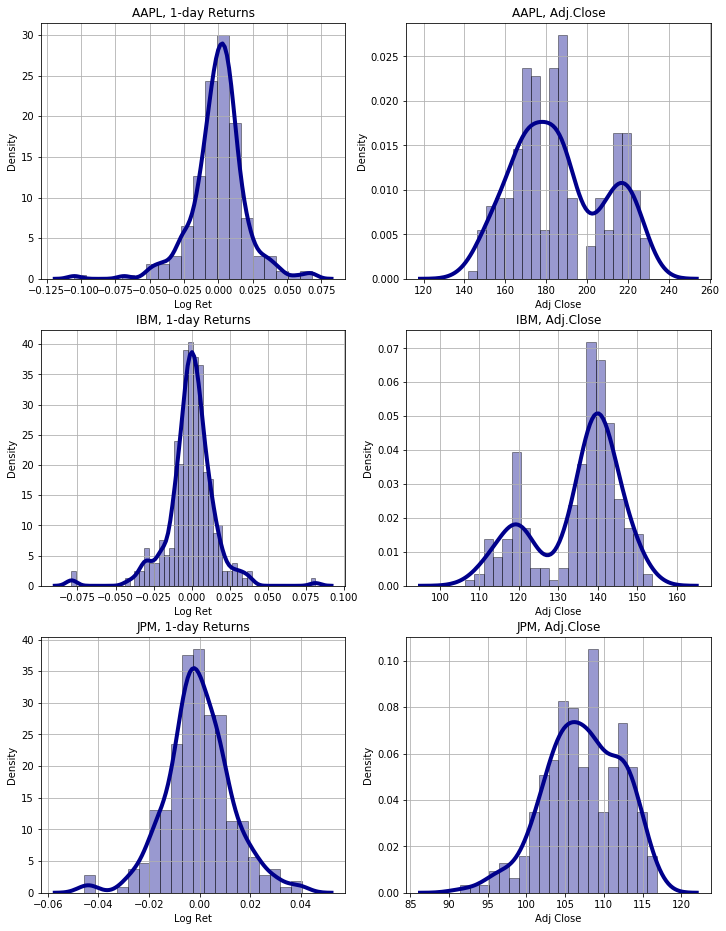

In [24]:
#question2
import seaborn as sns

fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
# ax7 = fig.add_subplot(427)
# ax8 = fig.add_subplot(428)

sns.distplot(df_aapl['Log Ret'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax1)
sns.distplot(df_aapl['Adj Close'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax2)
sns.distplot(df_ibm['Log Ret'], hist=True, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax3)
sns.distplot(df_ibm['Adj Close'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax4)
sns.distplot(df_jpm['Log Ret'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax5)
sns.distplot(df_jpm['Adj Close'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax6)
# sns.distplot(df_dji['Log Ret'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax7)
# sns.distplot(df_dji['Adj Close'], hist=True, kde=True, bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4}, ax=ax8)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
# ax7.grid()
# ax8.grid()

ax1.set_ylabel("Density")
ax2.set_ylabel("Density")
ax3.set_ylabel("Density")
ax4.set_ylabel("Density")
ax5.set_ylabel("Density")
ax6.set_ylabel("Density")
# ax7.set_ylabel("Density")
# ax8.set_ylabel("Density")

ax1.set_title("AAPL, 1-day Returns")
ax2.set_title("AAPL, Adj.Close")
ax3.set_title("IBM, 1-day Returns")
ax4.set_title("IBM, Adj.Close")
ax5.set_title("JPM, 1-day Returns")
ax6.set_title("JPM, Adj.Close")
# ax7.set_title("DJI, 1-day Returns")
# ax8.set_title("DJI, Adj.Close")

plt.savefig("images//return_adjclose")


In [15]:
#question3

def plot_rolling_mean(df, ax, title = None):
    rolling_mean = df['Adj Close'].rolling(5).mean().dropna()
    rolling_std = df['Adj Close'].rolling(5).std().dropna()
    rolling_mean.plot(title=title, label='Adj.Close', ax = ax)
    (rolling_mean - 1.5*rolling_std).plot(title=title, label='Adj.Close - 1.5 Std', ax = ax)
    (rolling_mean + 1.5*rolling_std).plot(title=title, label='Adj.Close + 1.5 Std', ax = ax)
    ax.set_ylabel("Rolling Mean")
    ax.grid()
    ax.legend()

def plot_rolling_median(df, ax, title = None):
    rolling_median = df['Adj Close'].rolling(5).median().dropna()
    rolling_median.plot(title=title, label='Adj.Close', ax=ax)
    mean_abs_dev=(abs(df['Adj Close']-df['Adj Close'].rolling(5).median())).median()
    (df['Adj Close'].rolling(5).median() + 1.5 * mean_abs_dev).dropna().plot(label='Adj. Close + 1.5 mad', ax = ax)
    (df['Adj Close'].rolling(5).median() - 1.5 * mean_abs_dev).dropna().plot(label='Adj. Close - 1.5 mad', ax = ax)
    ax.set_ylabel("Rolling Median")
    ax.grid()
    ax.legend()

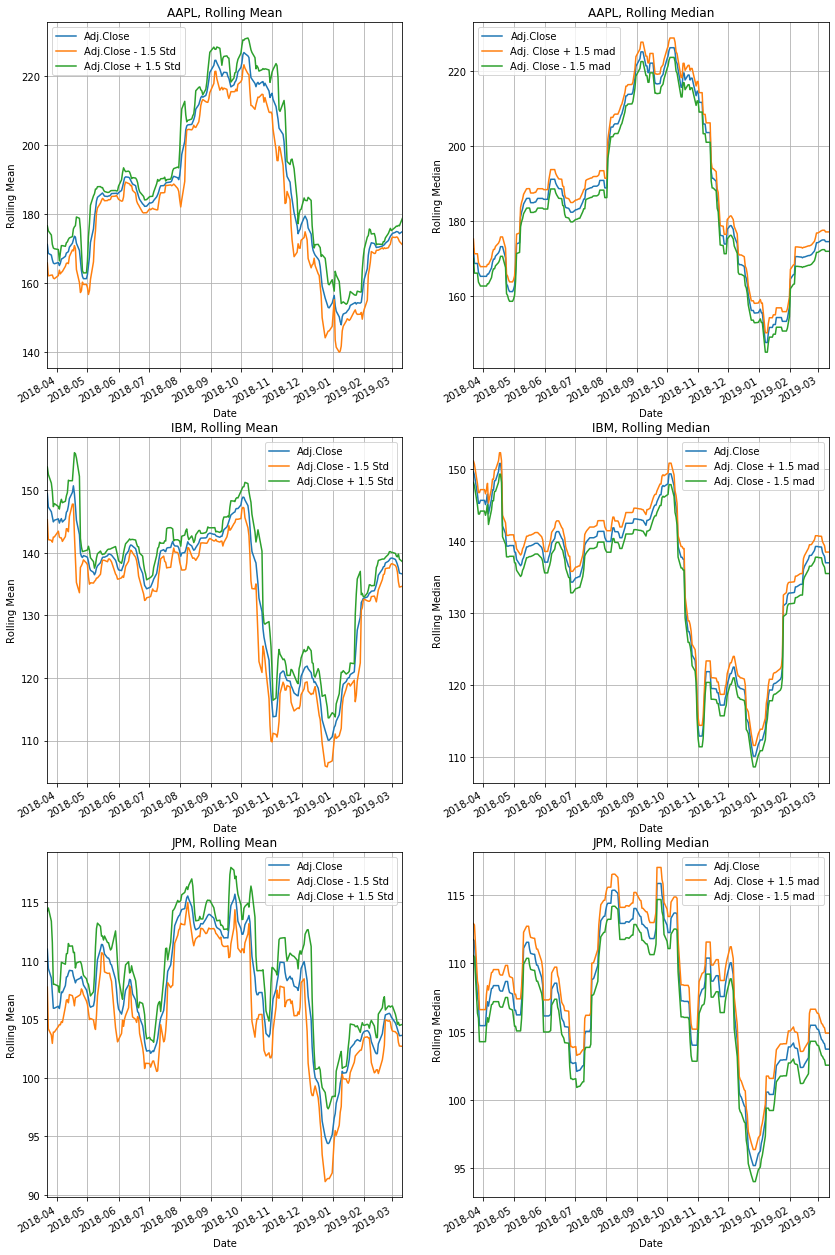

In [40]:
fig = plt.figure(figsize=(14,24))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
# ax7 = fig.add_subplot(427)
# ax8 = fig.add_subplot(428)

plot_rolling_mean(df_aapl, ax1, title = "AAPL, Rolling Mean")
plot_rolling_median(df_aapl, ax2, title = "AAPL, Rolling Median")
plot_rolling_mean(df_ibm, ax3, title = "IBM, Rolling Mean")
plot_rolling_median(df_ibm, ax4, title = "IBM, Rolling Median")
plot_rolling_mean(df_jpm, ax5, title = "JPM, Rolling Mean")
plot_rolling_median(df_jpm, ax6, title = "JPM, Rolling Median")
# plot_rolling_mean(df_dji, ax7, title = "DJI, Rolling Mean")
# plot_rolling_median(df_dji, ax8, title = "DJI, Rolling Median")

plt.savefig("images//rolling_mean_median")

In [20]:
#question4

def add_outlier(df):
    temp_df = df.copy()
    outlier = 1.2 * df['Adj Close'].max()
    temp_df['Adj Close'].loc['2018-05-14'] = outlier
    temp_df['Adj Close'].loc['2018-09-14'] = outlier
    temp_df['Adj Close'].loc['2018-12-14'] = outlier
    temp_df['Adj Close'].loc['2019-01-14'] = outlier
    return temp_df

outlier_aapl = add_outlier(df_aapl)
outlier_ibm = add_outlier(df_ibm)
outlier_jpm = add_outlier(df_jpm)
outlier_dji = add_outlier(df_dji)

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


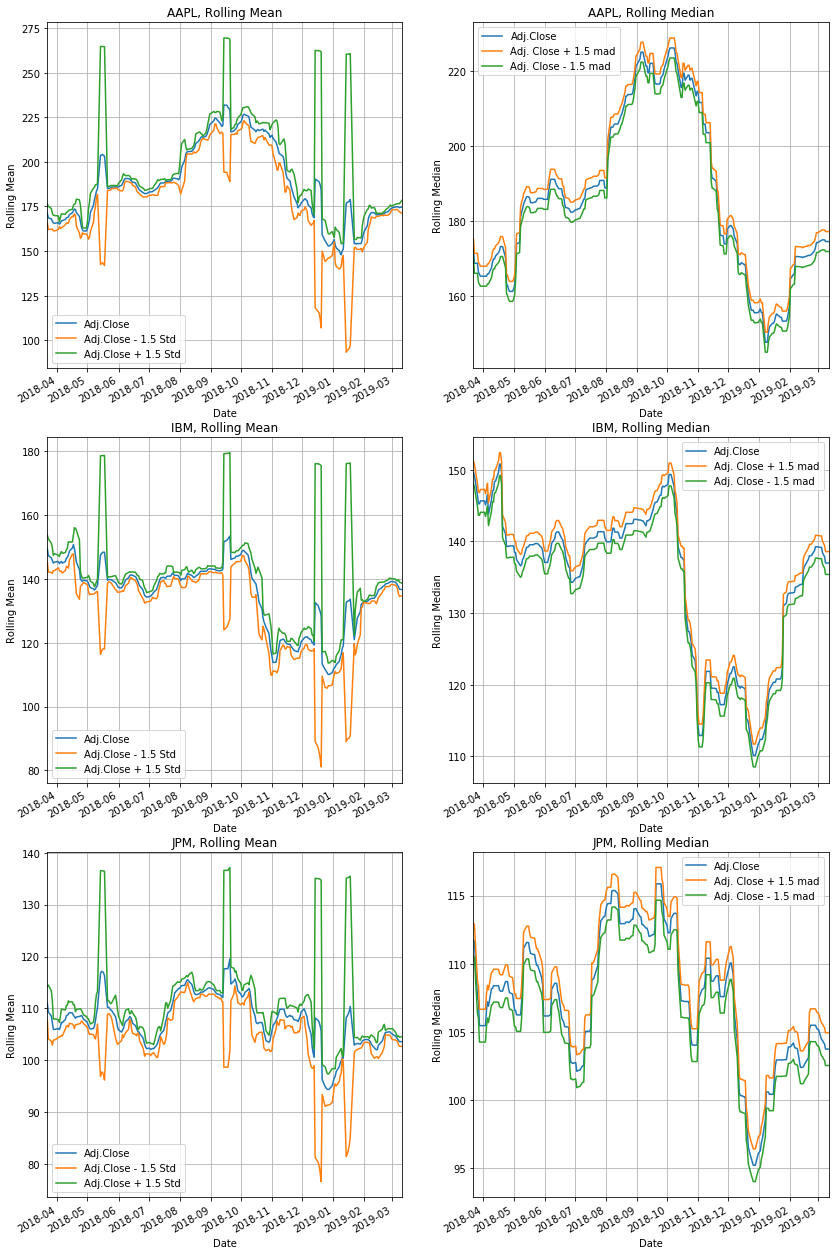

In [41]:
fig = plt.figure(figsize=(14,24))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
# ax7 = fig.add_subplot(427)
# ax8 = fig.add_subplot(428)

plot_rolling_mean(outlier_aapl, ax1, title = "AAPL, Rolling Mean")
plot_rolling_median(outlier_aapl, ax2, title = "AAPL, Rolling Median")
plot_rolling_mean(outlier_ibm, ax3, title = "IBM, Rolling Mean")
plot_rolling_median(outlier_ibm, ax4, title = "IBM, Rolling Median")
plot_rolling_mean(outlier_jpm, ax5, title = "JPM, Rolling Mean")
plot_rolling_median(outlier_jpm, ax6, title = "JPM, Rolling Median")
# plot_rolling_mean(outlier_dji, ax7, title = "DJI, Rolling Mean")
# plot_rolling_median(outlier_dji, ax8, title = "DJI, Rolling Median")

plt.savefig("images//outlier")

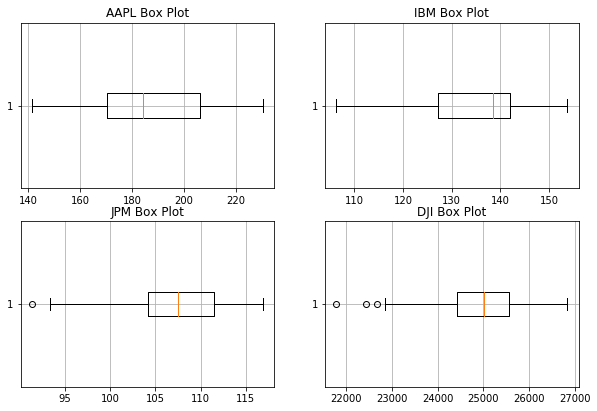

In [35]:
#question5

fig = plt.figure(figsize=(10,14))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

ax1.boxplot(df_aapl['Adj Close'], vert=False)
ax1.set_title('AAPL Box Plot')
ax2.boxplot(df_ibm['Adj Close'], vert=False)
ax2.set_title('IBM Box Plot')
ax3.boxplot(df_jpm['Adj Close'], vert=False)
ax3.set_title('JPM Box Plot')
ax4.boxplot(df_dji['Adj Close'], vert=False)
ax4.set_title('DJI Box Plot')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.savefig("images//boxplot")